In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
import matplotlib.pyplot as plt

# Training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [14]:
# Dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./dataset', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

In [15]:

# Model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 500)
        self.fc2 = nn.Linear(500, 10)
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [16]:
def train_model(model, optimizer, scheduler=None, epochs=50):
    criterion = nn.CrossEntropyLoss()
    losses = []
    accuracies = []
    
    for epoch in range(epochs):
        epoch_loss = 0.0
        correct = 0
        total = 0
        for i, (images, labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        avg_loss = epoch_loss / len(train_loader)
        acc = 100 * correct / total
        losses.append(avg_loss)
        accuracies.append(acc)
        
        if scheduler:
            scheduler.step()
        
        if epoch % 10 == 0:  # Print every 10 epochs
            print(f"Epoch [{epoch}/{epochs}], Loss: {avg_loss:.4f}, Accuracy: {acc:.2f}%")

    return losses, accuracies


In [18]:
model1 = SimpleNN().to(device)
optimizer1 = optim.SGD(model1.parameters(), lr=0.01)
losses1, accuracies1 = train_model(model1, optimizer1)

model2 = SimpleNN().to(device)
optimizer2 = optim.SGD(model2.parameters(), lr=0.01, momentum=0.9)
losses2, accuracies2 = train_model(model2, optimizer2)

model3 = SimpleNN().to(device)
optimizer3 = optim.SGD(model3.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer3, step_size=10, gamma=0.5)
losses3, accuracies3 = train_model(model3, optimizer3, scheduler)


Epoch [0/50], Loss: 0.7194, Accuracy: 82.69%
Epoch [10/50], Loss: 0.1746, Accuracy: 95.08%
Epoch [20/50], Loss: 0.1046, Accuracy: 97.10%
Epoch [30/50], Loss: 0.0733, Accuracy: 98.03%
Epoch [40/50], Loss: 0.0552, Accuracy: 98.53%
Epoch [0/50], Loss: 0.3516, Accuracy: 89.71%
Epoch [10/50], Loss: 0.0320, Accuracy: 99.07%
Epoch [20/50], Loss: 0.0078, Accuracy: 99.88%
Epoch [30/50], Loss: 0.0025, Accuracy: 99.99%
Epoch [40/50], Loss: 0.0014, Accuracy: 100.00%
Epoch [0/50], Loss: 0.3497, Accuracy: 89.62%
Epoch [10/50], Loss: 0.0236, Accuracy: 99.39%
Epoch [20/50], Loss: 0.0094, Accuracy: 99.89%
Epoch [30/50], Loss: 0.0064, Accuracy: 99.97%
Epoch [40/50], Loss: 0.0055, Accuracy: 99.97%
Epoch [0/50], Loss: 0.3145, Accuracy: 90.53%
Epoch [10/50], Loss: 0.0356, Accuracy: 98.81%
Epoch [20/50], Loss: 0.0202, Accuracy: 99.33%
Epoch [30/50], Loss: 0.0154, Accuracy: 99.46%
Epoch [40/50], Loss: 0.0103, Accuracy: 99.63%


In [27]:
model4 = SimpleNN().to(device)
optimizer4 = optim.Adam(model4.parameters(), lr=0.001)
losses4, accuracies4 = train_model(model4, optimizer4)

model5 = SimpleNN().to(device)
optimizer5 = optim.Adam(model5.parameters(), lr=0.001)
scheduler2 = StepLR(optimizer5, step_size=10, gamma=0.5)
losses5, accuracies5 = train_model(model5, optimizer5, scheduler2)

Epoch [0/50], Loss: 0.3136, Accuracy: 90.63%
Epoch [10/50], Loss: 0.0366, Accuracy: 98.80%
Epoch [20/50], Loss: 0.0215, Accuracy: 99.26%
Epoch [30/50], Loss: 0.0165, Accuracy: 99.44%
Epoch [40/50], Loss: 0.0165, Accuracy: 99.49%
Epoch [0/50], Loss: 0.3174, Accuracy: 90.50%
Epoch [10/50], Loss: 0.0207, Accuracy: 99.34%
Epoch [20/50], Loss: 0.0031, Accuracy: 99.94%
Epoch [30/50], Loss: 0.0005, Accuracy: 100.00%
Epoch [40/50], Loss: 0.0002, Accuracy: 100.00%


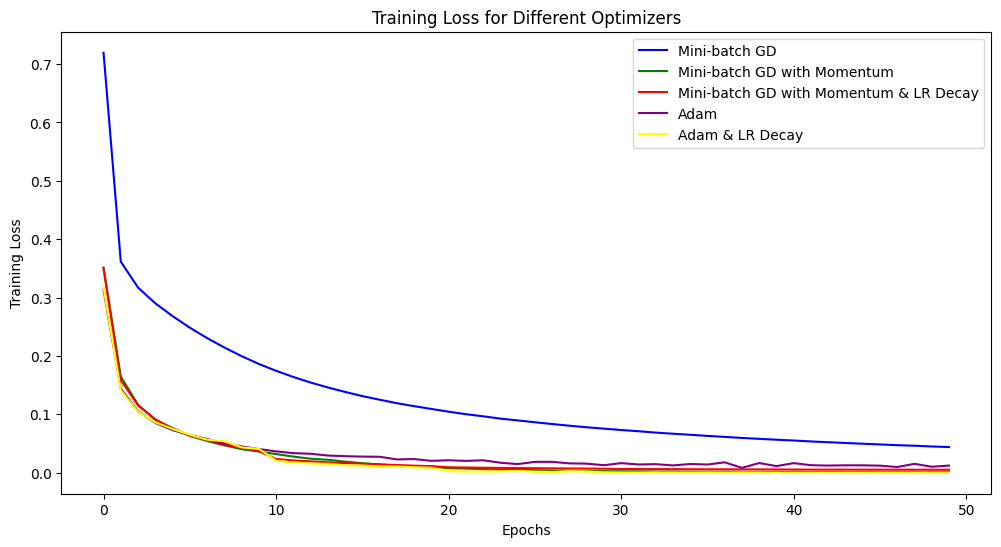

In [28]:
# Plotting the losses
plt.figure(figsize=(12, 6))
plt.plot(losses1, label='Mini-batch GD', color='blue')
plt.plot(losses2, label='Mini-batch GD with Momentum', color='green')
plt.plot(losses3, label='Mini-batch GD with Momentum & LR Decay', color='red')
plt.plot(losses4, label='Adam', color='purple')
plt.plot(losses5, label='Adam & LR Decay', color='yellow')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss for Different Optimizers')
plt.legend()
plt.show()

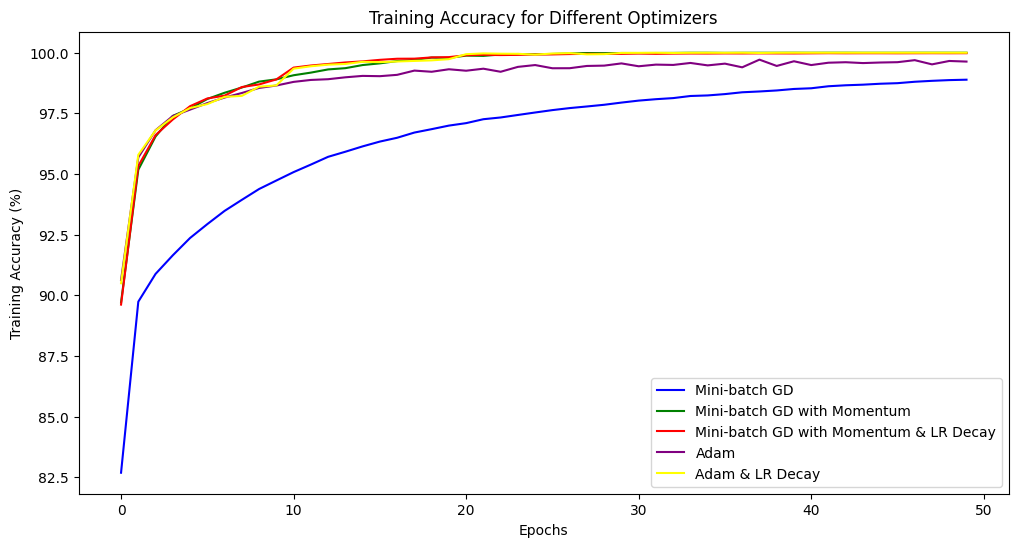

In [29]:
# Plotting the accuracies
plt.figure(figsize=(12, 6))
plt.plot(accuracies1, label='Mini-batch GD', color='blue')
plt.plot(accuracies2, label='Mini-batch GD with Momentum', color='green')
plt.plot(accuracies3, label='Mini-batch GD with Momentum & LR Decay', color='red')
plt.plot(accuracies4, label='Adam', color='purple')
plt.plot(accuracies5, label='Adam & LR Decay', color='yellow')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy (%)')
plt.title('Training Accuracy for Different Optimizers')
plt.legend()
plt.show()